<a href="https://colab.research.google.com/github/Gynethc19/tech-horizons-2024/blob/main/proyecto_final_tech_horizons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset

Columnas de años detectadas: ['F1961', 'F1962', 'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970', 'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978', 'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994', 'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022']


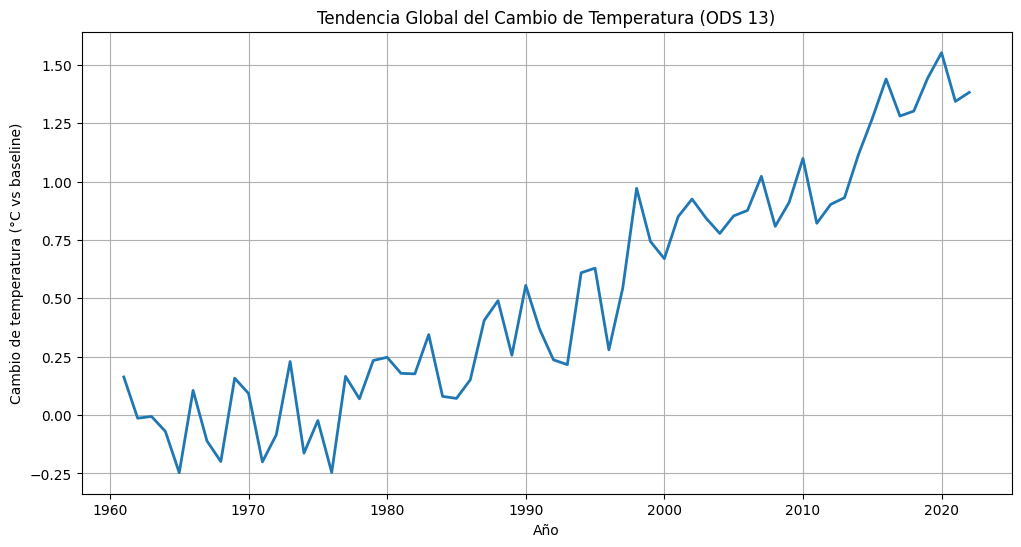

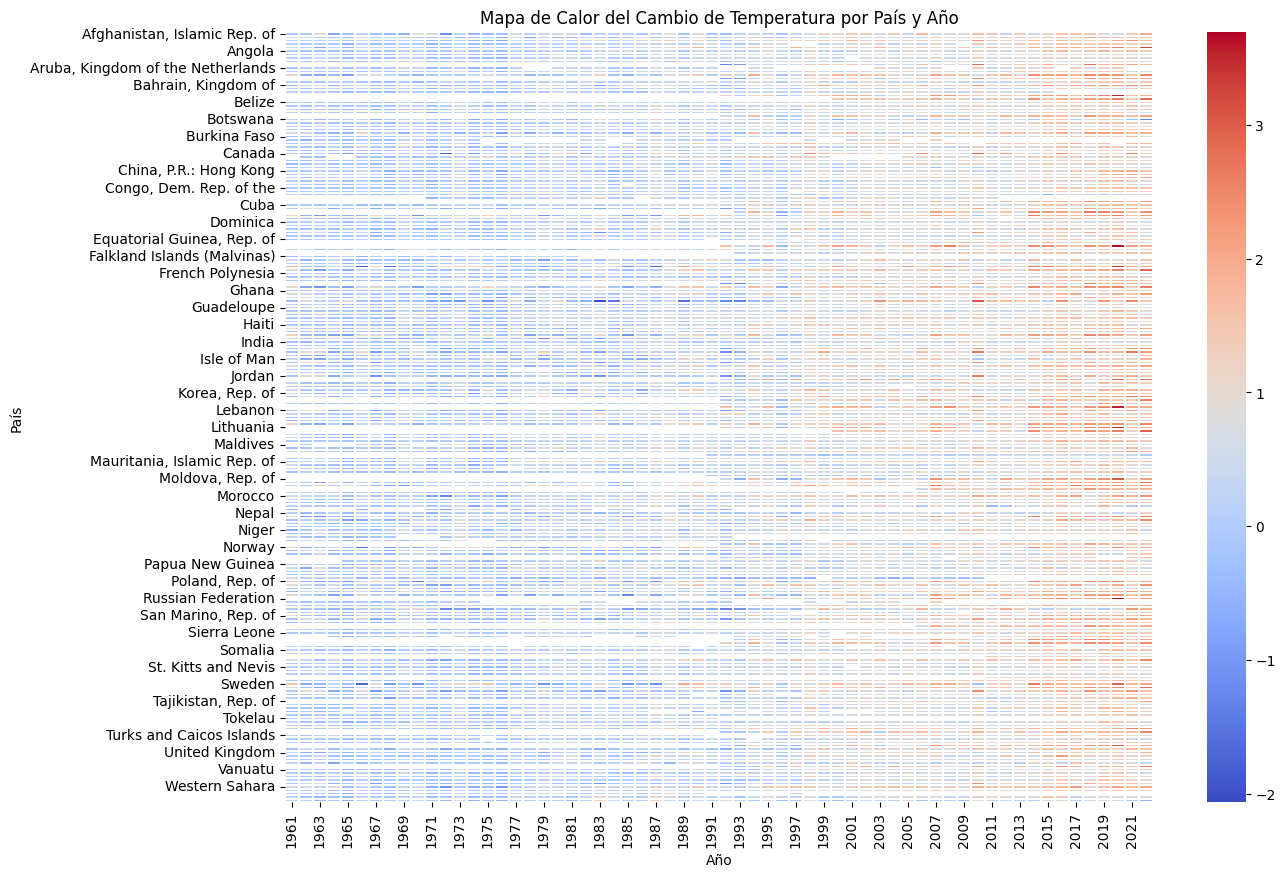


============ ANÁLISIS ODS 13 ============
Temperatura promedio inicial: 0.163 °C
Temperatura promedio final: 1.382 °C
Incremento total registrado: 1.219 °C

Interpretación:
- El gráfico de línea muestra cómo la temperatura global aumenta de forma sostenida.
- El mapa de calor revela qué países han experimentado mayores incrementos.
- Colores rojos = Aumentos más fuertes; colores azules = menores variaciones.



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/climate_change_indicators.csv",encoding='latin-1',sep="\t")


year_columns = [col for col in df.columns if col.startswith("F") and col[1:].isdigit()]

print("Columnas de años detectadas:", year_columns)

df_long = pd.melt(
    df,
    id_vars=[col for col in df.columns if col not in year_columns],
    value_vars=year_columns,
    var_name="year",
    value_name="temperature_change"
)

df_long["year"] = df_long["year"].str[1:].astype(int)
df_long = df_long.dropna(subset=["temperature_change"])


global_temp = df_long.groupby("year")["temperature_change"].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(global_temp["year"], global_temp["temperature_change"], linewidth=2)
plt.title("Tendencia Global del Cambio de Temperatura (ODS 13)")
plt.xlabel("Año")
plt.ylabel("Cambio de temperatura (°C vs baseline)")
plt.grid(True)
plt.show()


heatmap_data = df_long.pivot_table(
    index="Country",
    columns="year",
    values="temperature_change",
    aggfunc="mean"
)

plt.figure(figsize=(14,10))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.2)
plt.title("Mapa de Calor del Cambio de Temperatura por País y Año")
plt.xlabel("Año")
plt.ylabel("País")
plt.show()


inicio = global_temp["temperature_change"].iloc[0]
final = global_temp["temperature_change"].iloc[-1]
incremento = final - inicio

print("\n============ ANÁLISIS ODS 13 ============")
print(f"Temperatura promedio inicial: {inicio:.3f} °C")
print(f"Temperatura promedio final: {final:.3f} °C")
print(f"Incremento total registrado: {incremento:.3f} °C")

print("""
Interpretación:
- El gráfico de línea muestra cómo la temperatura global aumenta de forma sostenida.
- El mapa de calor revela qué países han experimentado mayores incrementos.
- Colores rojos = Aumentos más fuertes; colores azules = menores variaciones.
""")

In [ ]:
import pandas as pd
import plotly.express as px
from google.colab import files

df = pd.read_csv('/content/climate_change_indicators.csv',encoding='latin-1',sep='\t')
anio = 'F2022'

df_map = df[['Country', anio]]

fig = px.choropleth(
    df_map,
    locations='Country',
    locationmode='country names',
    color=anio,
    color_continuous_scale='turbo',
    title=f'Cambio de temperatura global en {anio[-4:]} (°C) - ODS 13'
)
fig.show()


df_sorted = df_map.sort_values(by=anio, ascending=True).dropna()

print(" Países con menor aumento:")
print(df_sorted.head(10).to_string(index=False))


mitad_inicio = len(df_sorted)//2 - 5
mitad_fin    = len(df_sorted)//2 + 5
print("\n Países aumento intermedio:")
print(df_sorted.iloc[mitad_inicio:mitad_fin].to_string(index=False))

print("\n Países con mayor aumento:")
print(df_sorted.tail(10).to_string(index=False))


 Países con menor aumento:
                      Country  F2022
                     Botswana -1.305
                     Zimbabwe -0.490
Marshall Islands, Rep. of the  0.007
                      Namibia  0.239
             French Polynesia  0.359
                      Uruguay  0.382
                        Chile  0.407
                        Niger  0.428
                 Cook Islands  0.479
        Comoros, Union of the  0.521

 Países aumento intermedio:
                            Country  F2022
                              Kenya  1.280
                            Lebanon  1.290
                      Guinea-Bissau  1.295
                           Suriname  1.296
                          Singapore  1.311
          Timor-Leste, Dem. Rep. of  1.315
                        New Zealand  1.319
São Tomé and Príncipe, Dem. Rep. of  1.321
                        Gambia, The  1.323
                       Sierra Leone  1.328

 Países con mayor aumento:
                 Country  F2022
    

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd


df = pd.read_csv("/content/climate_change_indicators.csv", sep='\t', encoding='latin-1')

year_columns = [col for col in df.columns if col.startswith("F") and col[1:].isdigit()]

df_long = pd.melt(
    df,
    id_vars=[col for col in df.columns if col not in year_columns],
    value_vars=year_columns,
    var_name="year_str",
    value_name="temperature_change"
)

df_long["year"] = df_long["year_str"].str[1:].astype(int)
df_long = df_long.dropna(subset=["temperature_change"])

global_temp = df_long.groupby("year")["temperature_change"].mean().reset_index()

global_temp['decade'] = (global_temp['year'] // 10) * 10
decade_avg = global_temp.groupby("decade")["temperature_change"].mean().reset_index()

decade_avg['decade'] = decade_avg['decade'].astype(str) + 's'


x_linea = global_temp["year"]
y_linea = global_temp["temperature_change"]

x_barras = decade_avg["decade"]
y_barras = decade_avg["temperature_change"]


linea = go.Scatter(
    x=x_linea,
    y=y_linea,
    fill="tozeroy",
    mode="lines+markers",

    name="Cambio de Temperatura Global Anual (°C)",

    line=dict(color="#FF4500", width=3),
)

barras = go.Bar(
    x=x_barras,
    y=y_barras,

    name="Cambio Promedio de Temperatura por Década (°C)",
    zorder=1,

    marker=dict(color="#1f77b4"),
    opacity=0.7
)

fig = go.Figure(data=[linea, barras])

fig.update_layout(
    title={
        'text': "🌍 Tendencia del Cambio de Temperatura Global (1961 - 2018)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Año / Década",
    yaxis_title="Cambio de Temperatura Promedio (°C vs Línea Base)",
    barmode='overlay',
    legend=dict(x=0.01, y=0.99)
)

fig.show()